# **1. Import Library**

Import library yang dibutuhkan

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns
import numpy as np
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# **2. Load Dataset**

Load dataset dari lokal

In [5]:
df = pd.read_csv(r'\Users\asus\Documents\PYTHON_PROJECT\hotel_books\hotel_bookings.csv')

Dataframe yang telah diload

In [3]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


Ubah kolom menjadi tipe datetime

In [6]:
df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"])

Informasi dataframe

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

Template untuk eksplorasi data kategorikal

In [7]:
def showplot(df, column):
    count_data = df[column].value_counts()
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    plt.rcParams['font.family'] = 'Verdana'

    colors = plt.cm.Paired.colors
    ax[0].pie(
        count_data.values, labels=None, autopct='%1.1f%%', startangle=90,
        colors=colors, pctdistance=0.85, wedgeprops=dict(width=0.3)
    )
    ax[0].set_title(f"Distribution of {column} (%)", fontname='Verdana', fontsize=14, fontweight='bold')

    bars = ax[1].barh(count_data.index, count_data.values, color=colors)
    ax[1].set_title(f"{column} Count", fontname='Verdana', fontsize=14, fontweight='bold')
    ax[1].set_xlabel("Count", fontname='Verdana', fontsize=12)
    ax[1].invert_yaxis()

    for bar in bars:
        x_val = bar.get_width()
        y_val = bar.get_y() + bar.get_height() / 2
        ax[1].text(x_val - 50, y_val, f'{int(x_val)}', va='center', ha='right',
                   fontname='Verdana', fontsize=12, fontweight='bold', color='white')

    ax[0].legend(count_data.index, loc="best", prop={'family': 'Verdana', 'size': 10})

    plt.tight_layout()
    plt.show()

Sebaran letak hotel

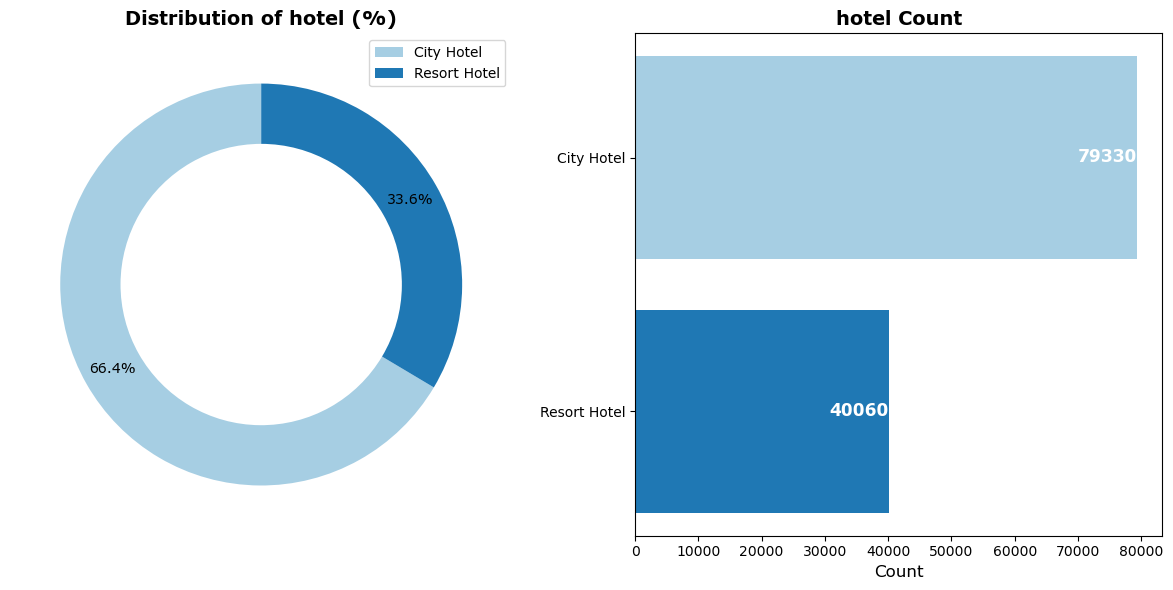

In [8]:
showplot(df, 'hotel')

Sebaran status reservasi

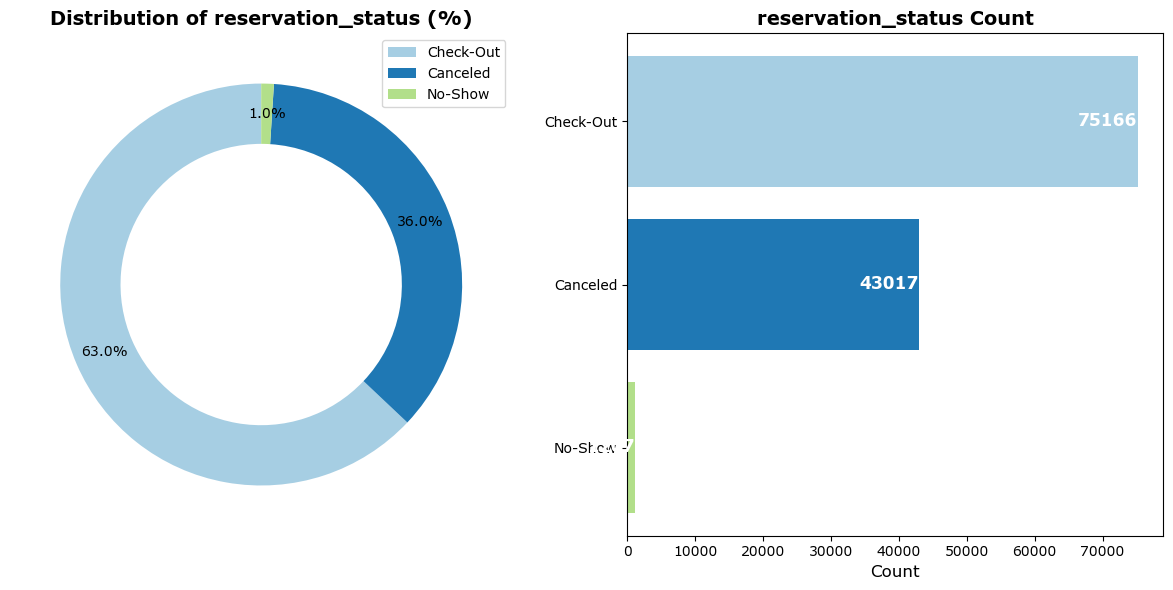

In [ ]:
showplot(df,'is_canceled')

Perbandingan status booking hotel resort dan hotel di perkotaan

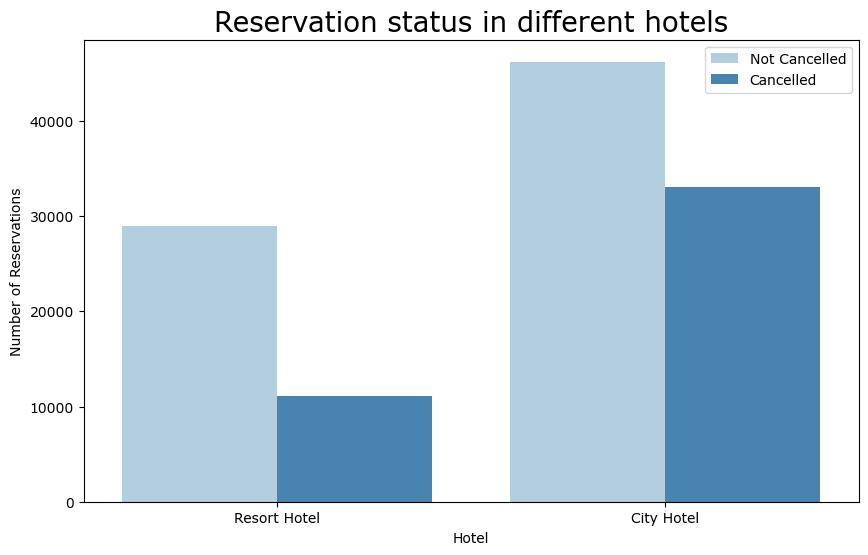

In [10]:
plt.figure(figsize=(10, 6))

ax1 = sns.countplot(x='hotel', hue='is_canceled', data=df, palette='Blues')
legend_labels, _ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1, 1))

plt.title('Reservation status in different hotels', size=20, color='Black', fontname='Verdana')
plt.ylabel('Number of Reservations', color='Black', fontname='Verdana')
plt.xlabel('Hotel', color='Black', fontname='Verdana')

plt.legend(['Not Cancelled', 'Cancelled'])

plt.show()

Melihat rerata harga per hari tiap bulan. Bisa terlihat bulan juni dan agustus memiliki harga tertinggi

C:\Users\asus\AppData\Local\Temp\ipykernel_16792\2716215644.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=adr_per_bulan, x='arrival_date_month', y='adr', palette='Blues')


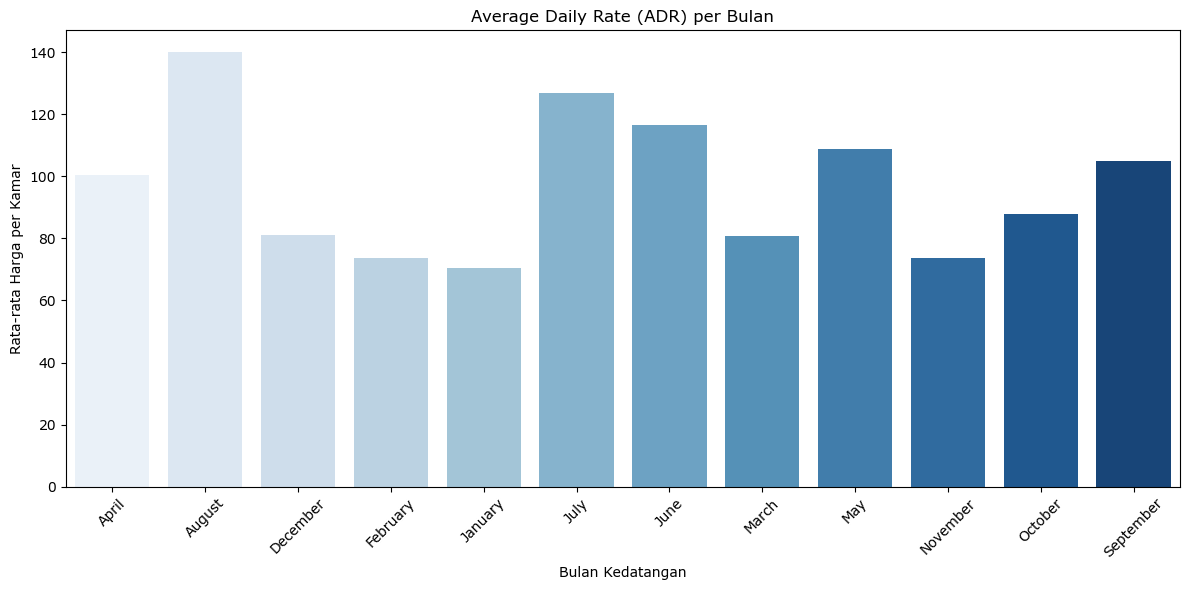

In [11]:
adr_per_bulan = df.groupby('arrival_date_month')['adr'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=adr_per_bulan, x='arrival_date_month', y='adr', palette='Blues')
plt.title('Average Daily Rate (ADR) per Bulan')
plt.xlabel('Bulan Kedatangan')
plt.ylabel('Rata-rata Harga per Kamar')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Histogram dari tiap kolom yang ada untuk meihat persebaran dari tiap kolom

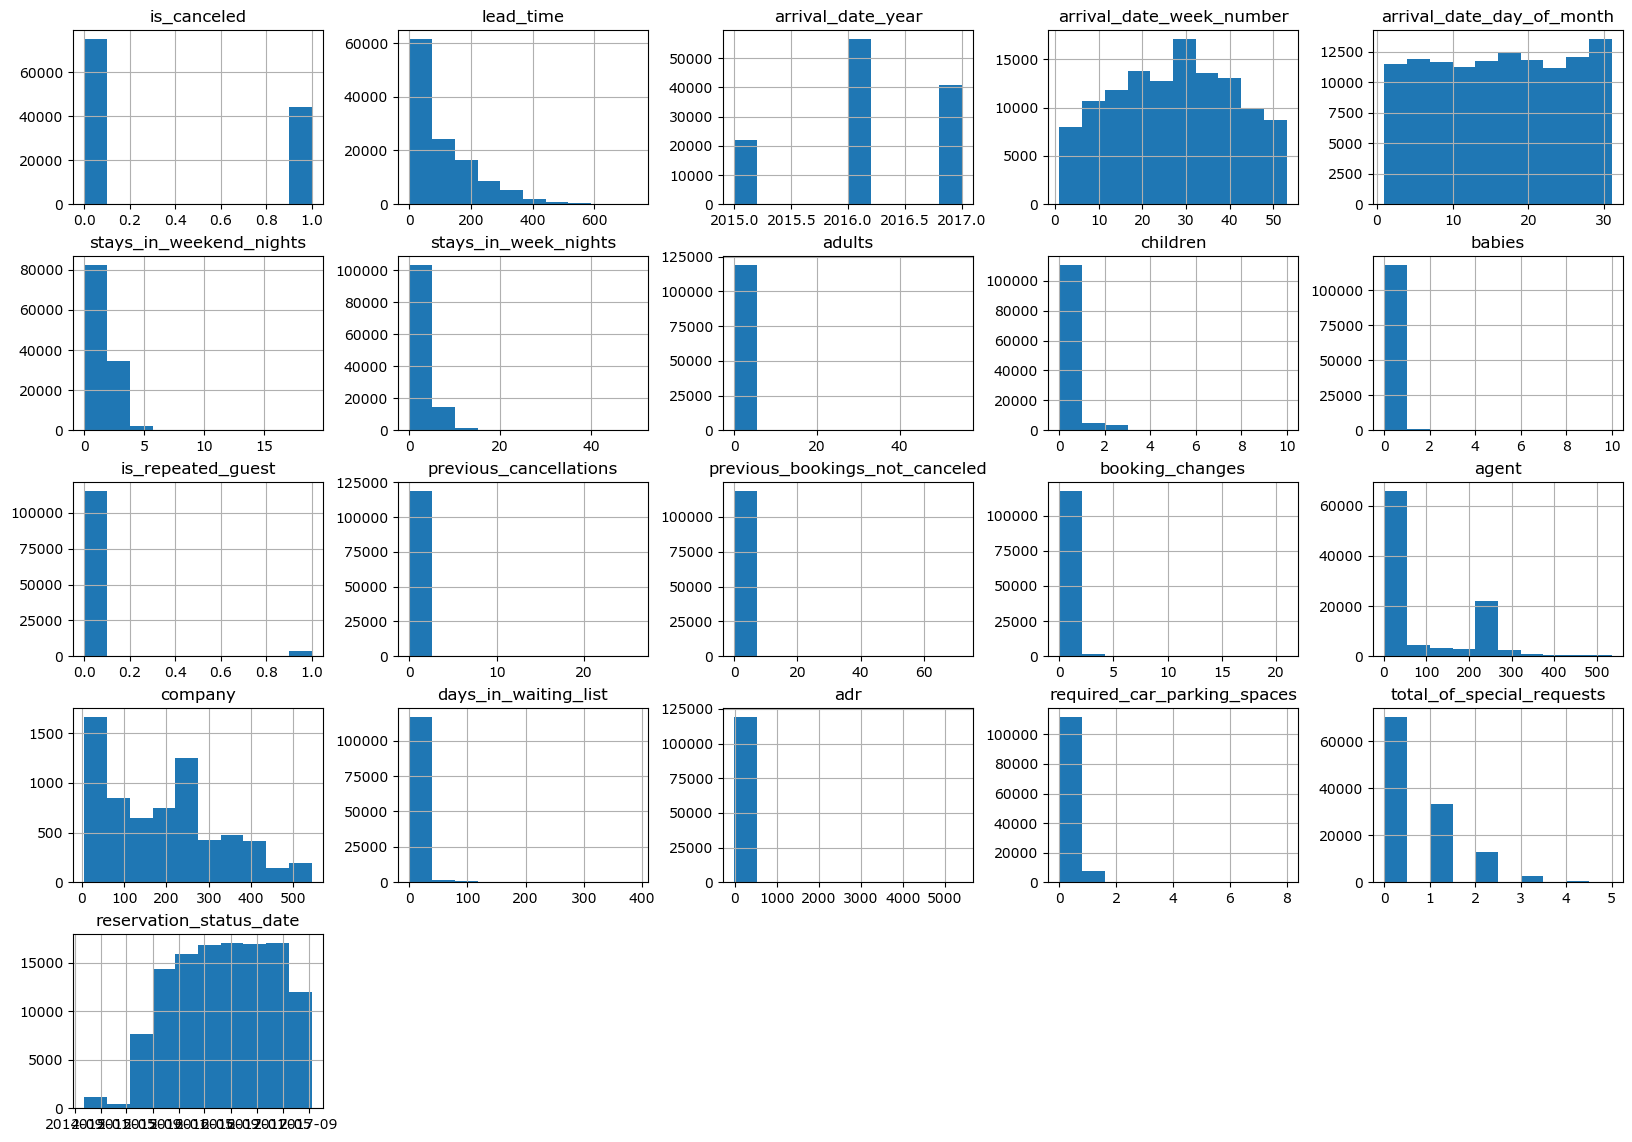

In [12]:
df.hist(figsize=(20,14))
plt.show()

Sebaran jarak booking dengan kedatangan

Text(0.5, 0, 'Lead Time (days)')

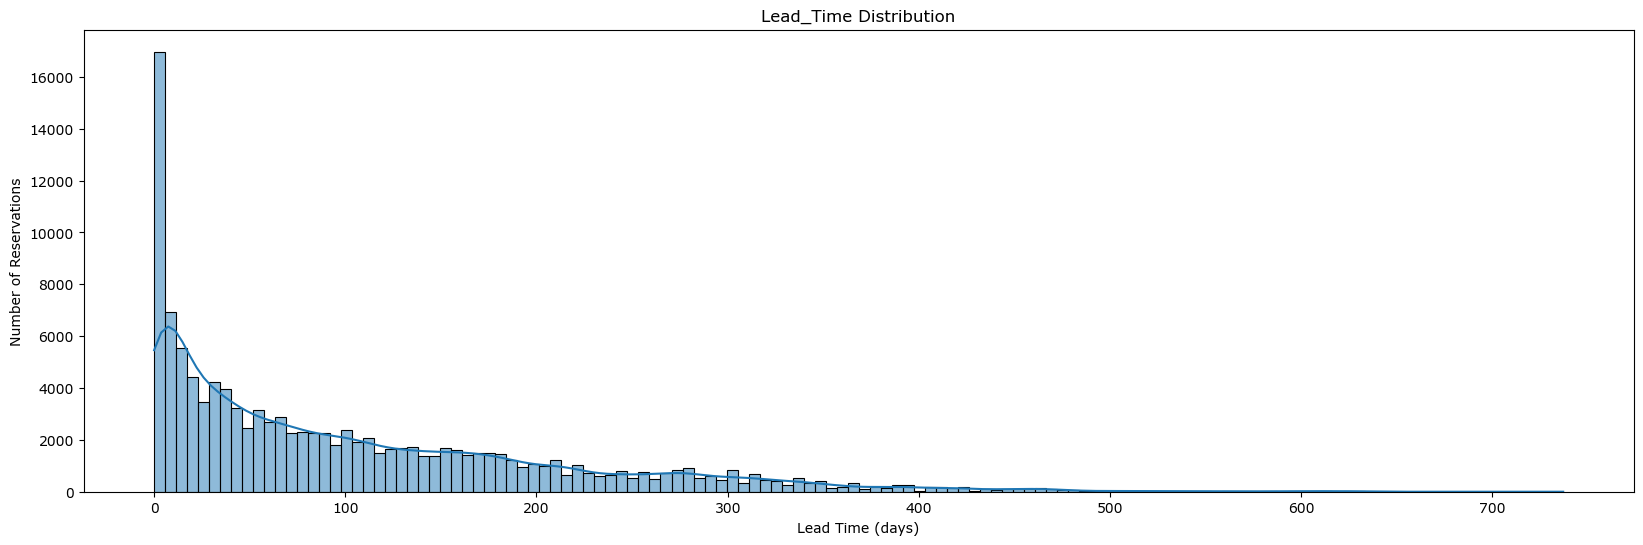

In [13]:
plt.figure(figsize=(20, 6))
sns.histplot(data=df, x='lead_time', kde=True)
plt.title('Lead_Time Distribution')
plt.ylabel('Number of Reservations')
plt.xlabel('Lead Time (days)')

Grafik perubahan harga dari status pembataln yang mengikuti tanggal dari tahun 2015 hingga 2017. Bisa dilihat setiap terjadi pembatalan, ada kenaikan harga pada kamar.

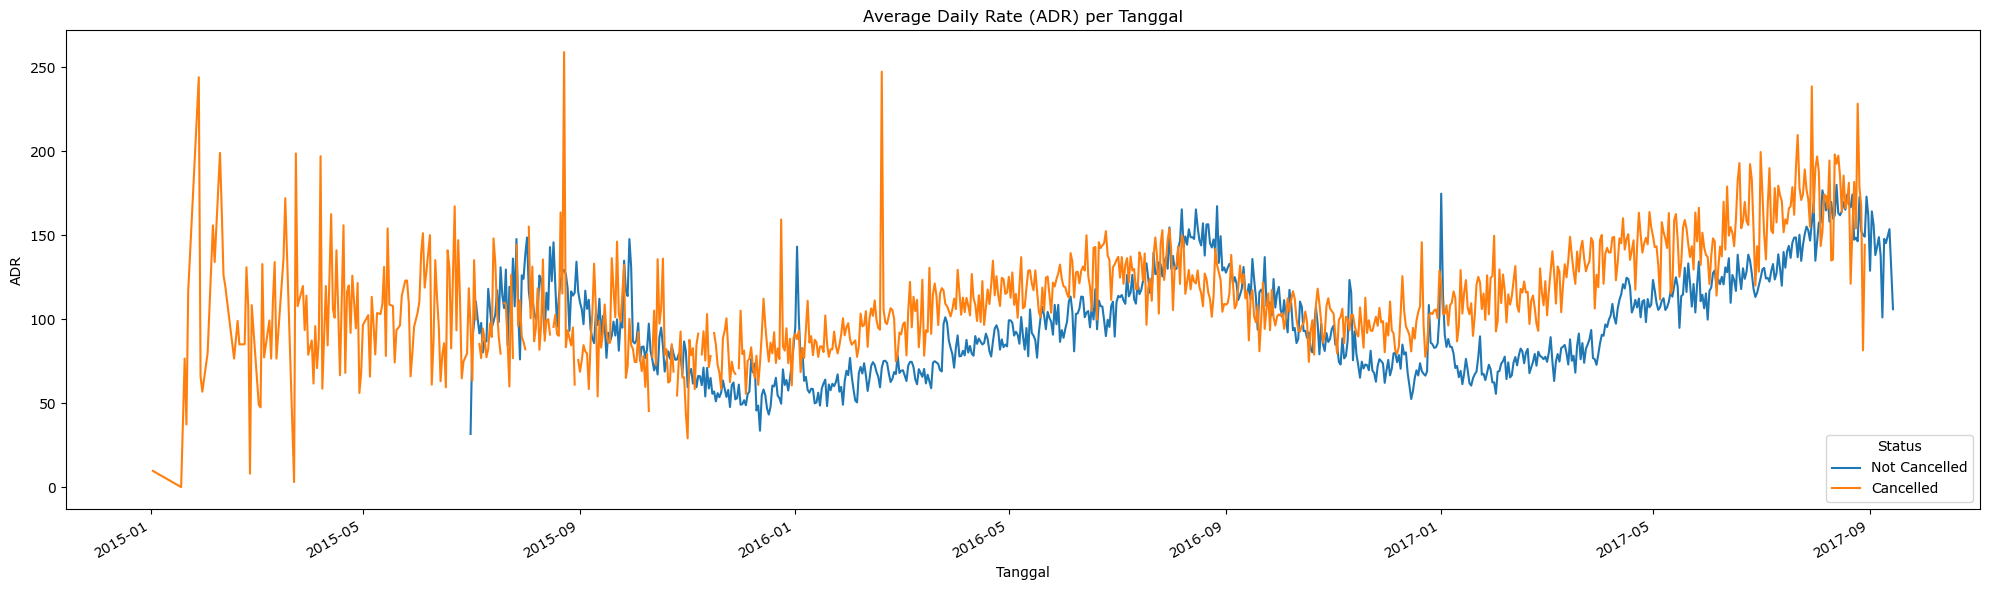

In [14]:
mask = (df['reservation_status_date'] > '2015-01-01') & (df['reservation_status_date'] < '2017-12-31')
filtered_df = df[mask]

adr_by_status = (
    filtered_df
    .groupby(['reservation_status_date', 'is_canceled'])['adr']
    .mean()
    .unstack()  
)

plt.figure(figsize=(20, 6))
adr_by_status.plot(ax=plt.gca())
plt.title('Average Daily Rate (ADR) per Tanggal')
plt.xlabel('Tanggal')
plt.ylabel('ADR')
plt.legend(['Not Cancelled', 'Cancelled'], title='Status')
plt.tight_layout()
plt.show()

Mendeskripsikan tiap kolom

In [15]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,...,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,...,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363,2016-07-30 00:24:47.883407104
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000,2016-02-01 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000,2016-08-07 00:00:00
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000,2017-02-08 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,...,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798,NaN


# **4. Data Preprocessing**

Periksa baris yang kosong

In [7]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Drop data kosong dan kolom yang tidak diperlukan

In [8]:
df = df.drop(['company','agent','country', 'reservation_status_date','market_segment','distribution_channel','arrival_date_year','reservation_status'], axis=1)
df = df.dropna()

Mengubah tipe data float ke int

In [9]:
exclude_cols = ['adr']  
float_columns = [col for col in df.select_dtypes(include=['float64']).columns if col not in exclude_cols]
df[float_columns] = df[float_columns].astype('int')

Cek data duplikat

In [10]:
df = df.drop_duplicates()
df.duplicated().sum()

0

Melihat fitur tersisa pada dataframe untuk modeling

In [20]:
df

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,July,27,1,0,0,2,0,...,0,C,C,3,No Deposit,0,Transient,0.00,0,0
1,Resort Hotel,0,737,July,27,1,0,0,2,0,...,0,C,C,4,No Deposit,0,Transient,0.00,0,0
2,Resort Hotel,0,7,July,27,1,0,1,1,0,...,0,A,C,0,No Deposit,0,Transient,75.00,0,0
3,Resort Hotel,0,13,July,27,1,0,1,1,0,...,0,A,A,0,No Deposit,0,Transient,75.00,0,0
4,Resort Hotel,0,14,July,27,1,0,2,2,0,...,0,A,A,0,No Deposit,0,Transient,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,August,35,30,2,5,2,0,...,0,A,A,0,No Deposit,0,Transient,96.14,0,0
119386,City Hotel,0,102,August,35,31,2,5,3,0,...,0,E,E,0,No Deposit,0,Transient,225.43,0,2
119387,City Hotel,0,34,August,35,31,2,5,2,0,...,0,D,D,0,No Deposit,0,Transient,157.71,0,4
119388,City Hotel,0,109,August,35,31,2,5,2,0,...,0,A,A,0,No Deposit,0,Transient,104.40,0,0


Melakukan encoding pada data categorical 

In [11]:
list_cate = [col for col in df.columns if df[col].dtype == 'object']

le = LabelEncoder()

for col in list_cate:
    df[col] = le.fit_transform(df[col])

Hasil baris yang tersisa

In [22]:
df.value_counts().sum()

85253

# **5. Data Splitting**

split dataset fitur dan label

In [12]:
X = df.drop(['is_canceled'], axis=1)
y = df['is_canceled']

Split X dan y menjadi train dan test

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

Melihat banyak baris X_test

In [14]:
X_test.value_counts().sum()

17051

Melihat baris label pada is_canceled

In [15]:
df['is_canceled'].value_counts()

is_canceled
0    61551
1    23702
Name: count, dtype: int64

# **6. Model**

Train model Random Forest

In [27]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Buat prediksi berdasarkan dataset train dan test

In [28]:
y_preds = clf.predict(X_test)
y_train_preds = clf.predict(X_train)

Akurasi prediksi model terhadap data train

In [29]:
print(f"Accurracy: {accuracy_score(y_train, y_train_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_train, y_train_preds, average='weighted')}")
print(f"Recall: {recall_score(y_train, y_train_preds, average='weighted')}")
print(f"F1: {f1_score(y_train, y_train_preds, average='weighted')}")

Accurracy: 99.54%
Precision: 0.9953656973615491
Recall: 0.9953667047887159
F1: 0.9953619705098739


Akurasi prediksi model terhadap data test

In [30]:
print(f"Accurracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_preds, average='weighted')}")
print(f"F1: {f1_score(y_test, y_preds, average='weighted')}")

Accurracy: 80.15%
Precision: 0.7910771863811517
Recall: 0.8014779191836255
F1: 0.7906889364832914


Classification report pada model random forest dengan akurasi 80%

In [31]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87     12371
           1       0.69      0.50      0.58      4680

    accuracy                           0.80     17051
   macro avg       0.76      0.71      0.73     17051
weighted avg       0.79      0.80      0.79     17051



Confusion matrix atau keberhasilan memprediksi label

In [32]:
confusion_matrix(y_test, y_preds)

pd.crosstab(y_test,y_preds,
            rownames = ["Actual Labels"],
            colnames = ["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,11316,1055
1,2330,2350


Train model Logistic Regression

In [18]:
clf_lin = LogisticRegression(random_state=42)
clf_lin.fit(X_train, y_train)

c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

Buat prediksi berdasarkan data train dan test

In [19]:
lin_y_preds = clf_lin.predict(X_test)
lin_y_train_preds = clf_lin.predict(X_train)

Akurasi prediksi terhadap data train

In [20]:
print(f"Accurracy: {accuracy_score(y_train, lin_y_train_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_train, lin_y_train_preds, average='weighted')}")
print(f"Recall: {recall_score(y_train, lin_y_train_preds, average='weighted')}")
print(f"F1: {f1_score(y_train, lin_y_train_preds, average='weighted')}")

Accurracy: 74.39%
Precision: 0.7169965684356988
Recall: 0.7438638163103721
F1: 0.704311505193437


Akurasi prediksi terhadap data test


In [21]:
print(f"Accurracy: {accuracy_score(y_test, lin_y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, lin_y_preds, average='weighted')}")
print(f"Recall: {recall_score(y_test, lin_y_preds, average='weighted')}")
print(f"F1: {f1_score(y_test, lin_y_preds, average='weighted')}")

Accurracy: 74.39%
Precision: 0.714232835551576
Recall: 0.7438859890915489
F1: 0.7019376252249879


Classification report untuk logistic regression dengan akurasi 74%

In [22]:
print(classification_report(y_test, lin_y_preds))

              precision    recall  f1-score   support

           0       0.76      0.94      0.84     12371
           1       0.58      0.23      0.33      4680

    accuracy                           0.74     17051
   macro avg       0.67      0.59      0.59     17051
weighted avg       0.71      0.74      0.70     17051



# **7. Tuning Model**

Random Forest Tuning dengan Random Search

In [16]:
param_distributions = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
                       "max_depth": [None, 5, 10, 20, 30],
                       "max_features": ["sqrt", "log2", None],
                       "min_samples_split": [2, 4, 6, 8],
                       "min_samples_leaf": [1, 2, 4, 8]}

Melakukan proses tuning

In [50]:
start_time = time.time()

np.random.seed(42)

clf = RandomForestClassifier(n_jobs=-1)

n_iter = 30
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=param_distributions,
                            n_iter=n_iter,
                            cv=5,
                            verbose=2)

rs_clf.fit(X_train, y_train);

end_time = time.time()
print(f"[INFO] Total time taken for {n_iter} random combinations of hyperparameters: {end_time - start_time:.2f} seconds.")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END max_depth=None, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=10; total time=   0.5s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=10; total time=   0.4s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=10; total time=   0.5s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=10; total time=   0.9s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=8, min_samples_split=2, n_estimators=10; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  30.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  26.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estima

Logistic Regression Tuning dengan Random Search

In [25]:
start_time = time.time()

np.random.seed(42)

clf_lin = LogisticRegression(n_jobs=-1)

n_iter = 30
param_distributions_lin = {
    'C': np.logspace(-4, 4, 10),
    'penalty': ['l1', 'l2'],
    'solver': ['saga', 'liblinear'],
    'max_iter': [500, 1000, 2000]
}
rs_clf_lin = RandomizedSearchCV(estimator=clf_lin,
                            param_distributions=param_distributions_lin,
                            n_iter=n_iter,
                            cv=5,
                            verbose=2)

rs_clf_lin.fit(X_train, y_train);

end_time = time.time()

Fitting 5 folds for each of 30 candidates, totalling 150 fits


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.046415888336127774, max_iter=2000, penalty=l1, solver=saga; total time= 1.8min


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.046415888336127774, max_iter=2000, penalty=l1, solver=saga; total time= 1.8min


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.046415888336127774, max_iter=2000, penalty=l1, solver=saga; total time= 1.2min


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.046415888336127774, max_iter=2000, penalty=l1, solver=saga; total time= 1.4min


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END C=0.046415888336127774, max_iter=2000, penalty=l1, solver=saga; total time= 1.4min
[CV] END C=0.046415888336127774, max_iter=2000, penalty=l2, solver=liblinear; total time=   1.2s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END C=0.046415888336127774, max_iter=2000, penalty=l2, solver=liblinear; total time=   1.5s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END C=0.046415888336127774, max_iter=2000, penalty=l2, solver=liblinear; total time=   1.1s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END C=0.046415888336127774, max_iter=2000, penalty=l2, solver=liblinear; total time=   1.1s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END C=0.046415888336127774, max_iter=2000, penalty=l2, solver=liblinear; total time=   1.2s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=0.0001, max_iter=1000, penalty=l1, solver=saga; total time=  38.2s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=0.0001, max_iter=1000, penalty=l1, solver=saga; total time=  38.1s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=0.0001, max_iter=1000, penalty=l1, solver=saga; total time=  39.6s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...C=0.0001, max_iter=1000, penalty=l1, solver=saga; total time=  38.4s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END ...C=0.0001, max_iter=1000, penalty=l1, solver=saga; total time=  40.0s
[CV] END C=0.3593813663804626, max_iter=1000, penalty=l2, solver=liblinear; total time=   1.1s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END C=0.3593813663804626, max_iter=1000, penalty=l2, solver=liblinear; total time=   1.2s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END C=0.3593813663804626, max_iter=1000, penalty=l2, solver=liblinear; total time=   1.2s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END C=0.3593813663804626, max_iter=1000, penalty=l2, solver=liblinear; total time=   1.3s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END C=0.3593813663804626, max_iter=1000, penalty=l2, solver=liblinear; total time=   1.2s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.005994842503189409, max_iter=500, penalty=l2, solver=saga; total time=  17.2s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.005994842503189409, max_iter=500, penalty=l2, solver=saga; total time=  16.0s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.005994842503189409, max_iter=500, penalty=l2, solver=saga; total time=  15.8s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.005994842503189409, max_iter=500, penalty=l2, solver=saga; total time=  15.7s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.005994842503189409, max_iter=500, penalty=l2, solver=saga; total time=  15.5s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=2.782559402207126, max_iter=1000, penalty=l1, solver=saga; total time=  37.7s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=2.782559402207126, max_iter=1000, penalty=l1, solver=saga; total time=  38.4s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=2.782559402207126, max_iter=1000, penalty=l1, solver=saga; total time=  37.5s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=2.782559402207126, max_iter=1000, penalty=l1, solver=saga; total time=  38.6s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END C=2.782559402207126, max_iter=1000, penalty=l1, solver=saga; total time=  38.7s
[CV] END C=21.54434690031882, max_iter=500, penalty=l1, solver=liblinear; total time=   0.8s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END C=21.54434690031882, max_iter=500, penalty=l1, solver=liblinear; total time=   0.8s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END C=21.54434690031882, max_iter=500, penalty=l1, solver=liblinear; total time=   0.7s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END C=21.54434690031882, max_iter=500, penalty=l1, solver=liblinear; total time=   1.0s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END C=21.54434690031882, max_iter=500, penalty=l1, solver=liblinear; total time=   1.0s
[CV] END ...C=0.0001, max_iter=2000, penalty=l2, solver=saga; total time= 1.0min
[CV] END ...C=0.0001, max_iter=2000, penalty=l2, solver=saga; total time=  51.7s
[CV] END ...C=0.0001, max_iter=2000, penalty=l2, solver=saga; total time=  46.6s
[CV] END ...C=0.0001, max_iter=2000, penalty=l2, solver=saga; total time=  47.4s
[CV] END ...C=0.0001, max_iter=2000, penalty=l2, solver=saga; total time=  47.9s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.046415888336127774, max_iter=1000, penalty=l1, solver=saga; total time=  38.1s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.046415888336127774, max_iter=1000, penalty=l1, solver=saga; total time=  38.2s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.046415888336127774, max_iter=1000, penalty=l1, solver=saga; total time=  39.0s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.046415888336127774, max_iter=1000, penalty=l1, solver=saga; total time=  38.4s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END C=0.046415888336127774, max_iter=1000, penalty=l1, solver=saga; total time=  39.0s
[CV] END C=1291.5496650148827, max_iter=2000, penalty=l2, solver=liblinear; total time=   1.3s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END C=1291.5496650148827, max_iter=2000, penalty=l2, solver=liblinear; total time=   1.3s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END C=1291.5496650148827, max_iter=2000, penalty=l2, solver=liblinear; total time=   1.4s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END C=1291.5496650148827, max_iter=2000, penalty=l2, solver=liblinear; total time=   1.3s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END C=1291.5496650148827, max_iter=2000, penalty=l2, solver=liblinear; total time=   1.6s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.000774263682681127, max_iter=1000, penalty=l2, solver=saga; total time=  32.4s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.000774263682681127, max_iter=1000, penalty=l2, solver=saga; total time=  35.6s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.000774263682681127, max_iter=1000, penalty=l2, solver=saga; total time=  36.4s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.000774263682681127, max_iter=1000, penalty=l2, solver=saga; total time=  38.2s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.000774263682681127, max_iter=1000, penalty=l2, solver=saga; total time=  35.2s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=2.782559402207126, max_iter=500, penalty=l2, solver=saga; total time=  15.5s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=2.782559402207126, max_iter=500, penalty=l2, solver=saga; total time=  13.7s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=2.782559402207126, max_iter=500, penalty=l2, solver=saga; total time=  16.3s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=2.782559402207126, max_iter=500, penalty=l2, solver=saga; total time=  15.3s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END C=2.782559402207126, max_iter=500, penalty=l2, solver=saga; total time=  13.9s
[CV] END C=0.0001, max_iter=2000, penalty=l2, solver=liblinear; total time=   0.5s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END C=0.0001, max_iter=2000, penalty=l2, solver=liblinear; total time=   0.6s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END C=0.0001, max_iter=2000, penalty=l2, solver=liblinear; total time=   0.7s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END C=0.0001, max_iter=2000, penalty=l2, solver=liblinear; total time=   0.5s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END C=0.0001, max_iter=2000, penalty=l2, solver=liblinear; total time=   0.5s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.046415888336127774, max_iter=500, penalty=l1, solver=saga; total time=  16.8s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.046415888336127774, max_iter=500, penalty=l1, solver=saga; total time=  16.3s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.046415888336127774, max_iter=500, penalty=l1, solver=saga; total time=  15.9s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.046415888336127774, max_iter=500, penalty=l1, solver=saga; total time=  15.1s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END C=0.046415888336127774, max_iter=500, penalty=l1, solver=saga; total time=  14.6s
[CV] END C=166.81005372000558, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.6s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END C=166.81005372000558, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.7s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END C=166.81005372000558, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.8s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END C=166.81005372000558, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.7s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END C=166.81005372000558, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.6s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END C=166.81005372000558, max_iter=1000, penalty=l2, solver=liblinear; total time=   1.0s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END C=166.81005372000558, max_iter=1000, penalty=l2, solver=liblinear; total time=   1.0s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END C=166.81005372000558, max_iter=1000, penalty=l2, solver=liblinear; total time=   1.0s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END C=166.81005372000558, max_iter=1000, penalty=l2, solver=liblinear; total time=   1.3s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END C=166.81005372000558, max_iter=1000, penalty=l2, solver=liblinear; total time=   1.1s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END C=10000.0, max_iter=500, penalty=l1, solver=liblinear; total time=   0.7s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END C=10000.0, max_iter=500, penalty=l1, solver=liblinear; total time=   0.6s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END C=10000.0, max_iter=500, penalty=l1, solver=liblinear; total time=   0.5s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END C=10000.0, max_iter=500, penalty=l1, solver=liblinear; total time=   0.7s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END C=10000.0, max_iter=500, penalty=l1, solver=liblinear; total time=   0.8s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....C=0.0001, max_iter=500, penalty=l1, solver=saga; total time=  13.8s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....C=0.0001, max_iter=500, penalty=l1, solver=saga; total time=  13.6s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....C=0.0001, max_iter=500, penalty=l1, solver=saga; total time=  14.0s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....C=0.0001, max_iter=500, penalty=l1, solver=saga; total time=  12.9s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....C=0.0001, max_iter=500, penalty=l1, solver=saga; total time=  12.9s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=166.81005372000558, max_iter=1000, penalty=l1, solver=saga; total time=  29.0s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=166.81005372000558, max_iter=1000, penalty=l1, solver=saga; total time=  28.7s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=166.81005372000558, max_iter=1000, penalty=l1, solver=saga; total time=  33.8s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=166.81005372000558, max_iter=1000, penalty=l1, solver=saga; total time=  29.5s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=166.81005372000558, max_iter=1000, penalty=l1, solver=saga; total time=  29.4s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1291.5496650148827, max_iter=2000, penalty=l1, solver=saga; total time=  57.2s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1291.5496650148827, max_iter=2000, penalty=l1, solver=saga; total time=  57.4s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1291.5496650148827, max_iter=2000, penalty=l1, solver=saga; total time= 1.2min


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=1291.5496650148827, max_iter=2000, penalty=l1, solver=saga; total time= 1.4min


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END C=1291.5496650148827, max_iter=2000, penalty=l1, solver=saga; total time= 1.4min
[CV] END C=2.782559402207126, max_iter=1000, penalty=l1, solver=liblinear; total time=   1.1s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END C=2.782559402207126, max_iter=1000, penalty=l1, solver=liblinear; total time=   1.7s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END C=2.782559402207126, max_iter=1000, penalty=l1, solver=liblinear; total time=   1.6s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END C=2.782559402207126, max_iter=1000, penalty=l1, solver=liblinear; total time=   1.0s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END C=2.782559402207126, max_iter=1000, penalty=l1, solver=liblinear; total time=   1.3s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END C=0.046415888336127774, max_iter=2000, penalty=l1, solver=liblinear; total time=   1.1s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END C=0.046415888336127774, max_iter=2000, penalty=l1, solver=liblinear; total time=   1.3s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END C=0.046415888336127774, max_iter=2000, penalty=l1, solver=liblinear; total time=   1.7s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END C=0.046415888336127774, max_iter=2000, penalty=l1, solver=liblinear; total time=   1.0s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END C=0.046415888336127774, max_iter=2000, penalty=l1, solver=liblinear; total time=   1.1s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END C=0.005994842503189409, max_iter=1000, penalty=l2, solver=liblinear; total time=   2.0s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END C=0.005994842503189409, max_iter=1000, penalty=l2, solver=liblinear; total time=   1.2s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END C=0.005994842503189409, max_iter=1000, penalty=l2, solver=liblinear; total time=   1.3s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END C=0.005994842503189409, max_iter=1000, penalty=l2, solver=liblinear; total time=   1.7s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END C=0.005994842503189409, max_iter=1000, penalty=l2, solver=liblinear; total time=   1.8s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=2.782559402207126, max_iter=2000, penalty=l2, solver=saga; total time= 1.2min


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=2.782559402207126, max_iter=2000, penalty=l2, solver=saga; total time= 1.4min


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=2.782559402207126, max_iter=2000, penalty=l2, solver=saga; total time= 1.4min


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=2.782559402207126, max_iter=2000, penalty=l2, solver=saga; total time= 1.2min


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=2.782559402207126, max_iter=2000, penalty=l2, solver=saga; total time= 1.1min


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.046415888336127774, max_iter=1000, penalty=l2, solver=saga; total time=  34.4s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.046415888336127774, max_iter=1000, penalty=l2, solver=saga; total time=  33.5s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.046415888336127774, max_iter=1000, penalty=l2, solver=saga; total time=  34.0s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.046415888336127774, max_iter=1000, penalty=l2, solver=saga; total time=  33.3s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.046415888336127774, max_iter=1000, penalty=l2, solver=saga; total time=  34.8s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.000774263682681127, max_iter=500, penalty=l1, solver=saga; total time=  19.9s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.000774263682681127, max_iter=500, penalty=l1, solver=saga; total time=  19.9s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.000774263682681127, max_iter=500, penalty=l1, solver=saga; total time=  20.7s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.000774263682681127, max_iter=500, penalty=l1, solver=saga; total time=  20.7s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END C=0.000774263682681127, max_iter=500, penalty=l1, solver=saga; total time=  20.1s
[CV] END C=0.000774263682681127, max_iter=500, penalty=l2, solver=liblinear; total time=   0.9s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END C=0.000774263682681127, max_iter=500, penalty=l2, solver=liblinear; total time=   1.0s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END C=0.000774263682681127, max_iter=500, penalty=l2, solver=liblinear; total time=   1.0s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END C=0.000774263682681127, max_iter=500, penalty=l2, solver=liblinear; total time=   1.2s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END C=0.000774263682681127, max_iter=500, penalty=l2, solver=liblinear; total time=   0.9s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..C=10000.0, max_iter=1000, penalty=l2, solver=saga; total time=  33.7s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..C=10000.0, max_iter=1000, penalty=l2, solver=saga; total time=  33.7s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..C=10000.0, max_iter=1000, penalty=l2, solver=saga; total time=  34.1s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..C=10000.0, max_iter=1000, penalty=l2, solver=saga; total time=  24.1s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..C=10000.0, max_iter=1000, penalty=l2, solver=saga; total time=  22.0s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=21.54434690031882, max_iter=1000, penalty=l1, solver=saga; total time=  28.2s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=21.54434690031882, max_iter=1000, penalty=l1, solver=saga; total time=  36.5s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=21.54434690031882, max_iter=1000, penalty=l1, solver=saga; total time=  44.0s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=21.54434690031882, max_iter=1000, penalty=l1, solver=saga; total time=  44.6s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END C=21.54434690031882, max_iter=1000, penalty=l1, solver=saga; total time=  33.1s
[CV] END C=1291.5496650148827, max_iter=500, penalty=l1, solver=liblinear; total time=   0.8s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END C=1291.5496650148827, max_iter=500, penalty=l1, solver=liblinear; total time=   0.7s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END C=1291.5496650148827, max_iter=500, penalty=l1, solver=liblinear; total time=   0.7s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END C=1291.5496650148827, max_iter=500, penalty=l1, solver=liblinear; total time=   0.5s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END C=1291.5496650148827, max_iter=500, penalty=l1, solver=liblinear; total time=   0.6s


c:\Users\asus\Documents\PYTHON_PROJECT\env\Lib\site-packages\sklearn\linear_model\_logistic.py:1271: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


# **8. Evaluasi Tuning**

Evaluasi Random Forest

parameter digunakan

In [52]:
rs_clf.best_params_

{'n_estimators': 1000,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 30}

Melakukan prediksi terhadap X_test serta akurasinya

In [53]:
rs_y_preds = rs_clf.predict(X_test)
print(f"Accurracy: {accuracy_score(y_test, rs_y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, rs_y_preds, average='weighted')}")
print(f"Recall: {recall_score(y_test, rs_y_preds, average='weighted')}")
print(f"F1: {f1_score(y_test, rs_y_preds, average='weighted')}")

Accurracy: 80.55%
Precision: 0.7959134329862844
Recall: 0.8054659550759486
F1: 0.7909792258817554


Akurasi pada classification report tidak berbeda jauh setelah proses tuning

In [54]:
print(classification_report(y_test, rs_y_preds))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87     12371
           1       0.72      0.47      0.57      4680

    accuracy                           0.81     17051
   macro avg       0.77      0.70      0.72     17051
weighted avg       0.80      0.81      0.79     17051



Evaluasi Linear Regression

Parameter terbaik

In [26]:
rs_clf_lin.best_params_

{'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 500, 'C': 10000.0}

Melakukan prediksi terhadap X_test

In [27]:
lin_rs_y_preds = rs_clf_lin.predict(X_test)
print(f"Accurracy: {accuracy_score(y_test, lin_rs_y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, lin_rs_y_preds, average='weighted')}")
print(f"Recall: {recall_score(y_test, lin_rs_y_preds, average='weighted')}")
print(f"F1: {f1_score(y_test, lin_rs_y_preds, average='weighted')}")

Accurracy: 75.75%
Precision: 0.73765519066988
Recall: 0.7574922291947687
F1: 0.7158037220948258


Hasil tuning juga tidak berbeda jauh pada logistic regression

In [28]:
print(classification_report(y_test, lin_rs_y_preds))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85     12371
           1       0.65      0.25      0.36      4680

    accuracy                           0.76     17051
   macro avg       0.71      0.60      0.61     17051
weighted avg       0.74      0.76      0.72     17051

